In [1]:
import argparse
import json
import numpy as np
import time
from os import listdir
from scipy import ndimage
import tensorflow as tf

import math
import matplotlib.pyplot as plt
%matplotlib inline

data_path = "dl-radiographs/data/labels.json"
# Instantiate the parser
# parser = argparse.ArgumentParser(description='Get data cleaning arguments')

# parser.add_argument('data_path', type=str,
#                     help='Relative source data path, including file name')

# parser.add_argument('out_path', type=str,
#                     help='Relative data output path, including file name')

#Parse
# args = parser.parse_args()


#Clean data

# data_path = args.data_path
# out_path = args.out_path

print(data_path)
# print(out_path)


if "." in data_path:
    print("gcjgfx", data_path.split(".")[-1])
    if data_path.split(".")[-1] != "json":
        raise ValueError("Invalid Extension")
else:
    data_path + ".json"


# if "." in out_path:
# 	print("qwerty", out_path.split(".")[-1])
# 	if out_path.split(".")[-1] != "csv" and out_path.split(".")[-1] != "txt":
# 		raise ValueError("Invalid Extension")
# else:
# 	out_path + ".csv"


data = []

for line in open(data_path, 'r'):
    data.append(json.loads(line))	

print len(data)

dl-radiographs/data/labels.json
('gcjgfx', 'json')
1022


In [2]:
data[0]

{u'B0': 1,
 u'Nproton': 10000000.0,
 u'dxyz': [0.491777037699935, 0.2885450477187051, 0.8215212113074664],
 u'iteration': 1,
 u'nb_blobs': 1,
 u'r': 1,
 u'run': 1,
 u'sign': -1,
 u'xyz': [2.16778017389989, 0.07290587000801096, 0.008047227368751853]}

In [3]:
number_blobs = []
for dic in data:
    number_blobs.append(dic['nb_blobs'])
print(np.shape(number_blobs))
Y = np.asarray(number_blobs)
print(type(Y))
Y -= 1 ## -1 since the labels are between 0 and 4 for softmax!

(1022,)
<type 'numpy.ndarray'>


In [4]:
def get_img_list(path_to_dir, extension=".png"):
	"""
	Collects the filenames of all the files in a directory with a certaine extension
	Input: 
	path_to_dir: path to the directory
	extension
	Output:
	list of file names
	"""
	filenames = listdir(path_to_dir)
	return [filename for filename in filenames if filename.endswith(extension)]

tic = time.time()

path_data = "./project2/dl-radiographs/data/radiographs/"

#Get file lists
data_list = get_img_list(path_data)

if __name__ == '__main__':
	X = np.array([ndimage.imread(path_data+img_name, flatten=False) for img_name in data_list])
	print X.shape

toc = time.time()

print toc - tic

(1021, 691, 691, 3)
14.4073040485


In [5]:
print('Shape X: ',np.shape(X))

('Shape X: ', (1021, 691, 691, 3))


(-0.5, 690.5, 690.5, -0.5)

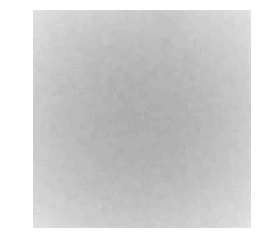

In [6]:
plt.imshow(X[10].astype('uint8'))
plt.axis('off')


In [7]:
print(Y)

[0 0 0 ..., 4 4 1]


In [8]:
indices = np.random.permutation(X.shape[0])
training_idx, test_idx = indices[:110], indices[110:]
X_test, X_train = X[training_idx,:], X[test_idx,:]
Y_test, Y_train = Y[training_idx], Y[test_idx]
print('Shape X_train: ', np.shape(X_train))
print('Shape X_test: ', np.shape(X_test))
print('Shape Y_train: ', np.shape(Y_train))
print('Shape Y_test: ', np.shape(Y_test))

('Shape X_train: ', (911, 691, 691, 3))
('Shape X_test: ', (110, 691, 691, 3))
('Shape Y_train: ', (911,))
('Shape Y_test: ', (110,))


In [9]:
print(Y_train)


[2 1 1 3 0 4 3 2 4 3 4 3 4 2 2 0 2 1 2 1 1 0 4 0 0 4 0 1 2 4 0 0 0 2 1 1 2
 2 3 3 0 3 2 0 3 0 0 4 3 3 1 2 0 1 4 4 1 1 4 0 0 0 4 0 0 0 0 2 1 1 0 3 2 2
 3 2 1 2 0 0 2 4 1 2 4 3 3 2 4 3 4 1 2 0 4 0 1 1 0 3 4 3 0 1 0 1 0 1 2 0 3
 1 0 2 1 2 3 2 4 2 2 3 4 3 2 1 4 4 0 2 2 1 4 0 3 0 0 4 1 0 4 4 2 1 4 1 0 3
 1 2 0 1 1 0 4 2 3 4 1 0 3 4 3 0 3 1 2 0 2 2 4 0 1 1 1 1 4 0 2 0 0 3 0 0 2
 4 1 4 4 0 1 0 3 0 4 2 4 2 4 4 2 3 3 0 3 2 1 2 2 0 0 1 0 4 0 0 2 0 1 3 2 1
 3 1 2 0 4 4 0 4 0 1 2 1 4 0 0 0 2 3 1 1 1 0 4 3 2 1 3 4 1 2 2 2 3 1 0 3 3
 2 0 4 4 2 3 1 0 4 3 1 0 2 3 2 0 3 3 4 1 0 4 0 4 2 1 0 0 3 1 4 4 0 1 3 2 2
 0 2 1 1 3 1 0 1 1 3 1 0 3 1 2 0 4 3 2 2 0 2 2 4 3 3 4 3 0 2 1 1 1 3 0 2 0
 0 1 1 3 0 0 4 0 0 0 3 2 2 3 1 2 2 0 2 0 4 1 2 2 1 3 4 1 1 2 0 2 2 0 4 3 1
 0 3 4 0 0 3 1 1 0 0 0 1 2 4 1 2 2 4 0 1 1 4 1 0 0 1 0 1 4 3 0 2 2 2 0 3 0
 0 2 2 2 1 3 0 2 1 2 2 0 4 0 0 1 4 3 0 0 2 3 2 4 3 1 0 4 0 2 4 2 4 2 2 0 3
 1 3 1 4 3 0 2 0 0 2 3 2 4 3 3 2 2 4 4 4 3 0 3 3 3 3 4 0 3 0 3 2 3 4 2 1 1
 4 0 0 4 3 3 4 4 4 3 1 1 

In [10]:
# Feel free to play with this cell
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 691, 691, 3])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

def my_model(X,y,is_training):
#  [conv-relu-conv-relu-pool]xN -> [affine]xM -> [softmax or SVM]   
    # First convolutional layer
    W_conv1 = tf.get_variable('W_conv1', dtype = tf.float32, shape = (5, 5, 3, 32), initializer = tf.contrib.layers.xavier_initializer())
    b_conv1 = tf.get_variable('b_conv1', dtype = tf.float32, shape = (32, ), initializer = tf.zeros_initializer())
    
    # Second convolutional layer
    W_conv2 = tf.get_variable('W_conv2', dtype = tf.float32, shape = (3, 3, 32, 64), initializer = tf.contrib.layers.xavier_initializer())
    b_conv2 = tf.get_variable('b_conv2', dtype = tf.float32, shape = (64, ), initializer = tf.zeros_initializer())

    W_conv3 = tf.get_variable('W_conv3', dtype = tf.float32, shape = (3, 3, 64, 128), initializer = tf.contrib.layers.xavier_initializer())
    b_conv3 = tf.get_variable('b_conv3', dtype = tf.float32, shape = (128, ), initializer = tf.zeros_initializer())

    
    W1 = tf.get_variable('W1', dtype = tf.float32, shape = (236672, 5), initializer = tf.contrib.layers.xavier_initializer())
    b1 = tf.get_variable('b1', dtype = tf.float32, shape = (5, ), initializer = tf.zeros_initializer())
    
#     W2 = tf.get_variable('W3', dtype = tf.float32, shape = (1024, 10), initializer = tf.contrib.layers.xavier_initializer())
#     b2 = tf.get_variable('b3', dtype = tf.float32, shape = (10,), initializer = tf.zeros_initializer())
    
    
    gamma1 = tf.get_variable('gamma1', dtype = tf.float32, shape = (32, ), initializer = tf.zeros_initializer())
    beta1 = tf.get_variable('beta1', dtype = tf.float32, shape = (32, ), initializer = tf.ones_initializer())
    
    gamma2 = tf.get_variable('gamma2', dtype = tf.float32, shape = (64, ), initializer = tf.zeros_initializer())
    beta2 = tf.get_variable('beta2', dtype = tf.float32, shape = (64, ), initializer = tf.ones_initializer())

    gamma3 = tf.get_variable('gamma3', dtype = tf.float32, shape = (128, ), initializer = tf.zeros_initializer())
    beta3 = tf.get_variable('beta3', dtype = tf.float32, shape = (128, ), initializer = tf.ones_initializer())

    conv1 = tf.nn.conv2d(X, W_conv1, strides = [1, 2, 2, 1], padding = 'SAME') + b_conv1
    r1 = tf.nn.relu(conv1)
    mean1, variance1 = tf.nn.moments(r1, axes = [0, 1, 2])
    bn1 = tf.nn.batch_normalization(r1, mean1, variance1, gamma1, beta1, 1e-8)
    print(bn1)
    
    conv2 = tf.nn.conv2d(bn1, W_conv2, strides = [1, 2, 2, 1], padding = 'SAME') + b_conv2
    r2 = tf.nn.relu(conv2)
    mean2, variance2 = tf.nn.moments(r2, axes = [0, 1, 2])
    bn2 = tf.nn.batch_normalization(r2, mean2, variance2, gamma2, beta2, 1e-8)  
    print(bn2)
    
    conv3 = tf.nn.conv2d(bn2, W_conv3, strides = [1, 2, 2, 1], padding = 'SAME') + b_conv3
    r3 = tf.nn.relu(conv3)
    mean3, variance3 = tf.nn.moments(r3, axes = [0, 1, 2])
    bn3 = tf.nn.batch_normalization(r3, mean3, variance3, gamma3, beta3, 1e-8)  
    print(bn3)
    mp3 = tf.nn.max_pool(bn3, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'VALID')
    print(mp3)
#     ll1 = tf.contrib.layers.fully_connected(mp2, 5, weights_initializer = tf.contrib.layers.xavier_initializer(), 
#                                             biases_initializer = tf.zeros_initializer())
    
    mp3 = tf.reshape(mp3, (-1, 236672))
    ll1 = tf.matmul(mp3, W1) + b1
    r4 = tf.nn.relu(ll1)
#     ll2 = tf.matmul(r4, W2) + b2
#     r5 = tf.nn.relu(ll2)
#     ll3 = tf.matmul(r5, W3) + b3
    reg = tf.nn.l2_loss(W_conv1) + tf.nn.l2_loss(W_conv2)
    return r4, reg

y_pred, reg = my_model(X,y,is_training)
reg_param = 5e-3
# total_loss = tf.nn.l2_loss(y_pred-y) + 0.5*reg_param*reg
total_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = y_pred, labels = y) + 0.5*reg_param*reg
mean_loss = tf.reduce_mean(total_loss) 
# global_step = tf.Variable(0, trainable = False)
starter_learning_rate = 1e-3
# # lr = tf.train.exponential_decay(starter_learning_rate, global_step, 5000, 0.96)
optimizer = tf.train.AdamOptimizer(learning_rate = 1e-3)
train_step = optimizer.minimize(mean_loss)

Tensor("batchnorm/add_1:0", shape=(?, 346, 346, 32), dtype=float32)
Tensor("batchnorm_1/add_1:0", shape=(?, 173, 173, 64), dtype=float32)
Tensor("batchnorm_2/add_1:0", shape=(?, 87, 87, 128), dtype=float32)
Tensor("MaxPool:0", shape=(?, 43, 43, 128), dtype=float32)


In [ ]:
def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=10,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indices
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%X_train.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
           
            print(np.shape(yd[idx]))
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[i:i+batch_size].shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss = session.run(variables,feed_dict=feed_dict)
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
#             correct += np.sum(corr)
            
            # print every now and then
#             if training_now and (iter_cnt % print_every) == 0:
#                 print(iter_cnt,np.sum(corr)/float(actual_batch_size))
            iter_cnt += 1
        total_correct = correct/float(Xd.shape[0])
        print(float(Xd.shape[0]))
        total_loss = np.sum(losses)/float(Xd.shape[0])
        print(total_loss,total_correct,e+1)
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0" 
        sess.run(tf.global_variables_initializer())
        print('Training')
        run_model(sess,y_pred,mean_loss,X_train,Y_train,1,64,100,train_step,True)
        print('Validation')
        run_model(sess,y_pred,mean_loss,X_val,Y_val,1,64)